In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utils import *
from plotting import *
import seaborn as sns


Open datasets and merge

In [2]:
# unpack data
dfolder = 'data/dscovr/' # location of data
df = read_year(dfolder, '2016') # open first year

# loop to collect and merge all datasets across all years
yr = 2017
while yr < 2023:
    df_yr = read_year(dfolder, str(yr))
    df = pd.concat([df, df_yr], ignore_index=True)
    yr +=1

# check    
df['time'][0]
print(df)

# dirty method for quick data overview
# print(df.describe())

                       time       BX       BY         BZ      FC0       FC1  \
0       2016-01-01 00:00:00  6.83609 -3.37934 -12.920500      NaN       NaN   
1       2016-01-01 00:01:00  6.76732 -3.30194 -12.996700      NaN       NaN   
2       2016-01-01 00:02:00  6.39107 -2.61173 -13.327100      NaN       NaN   
3       2016-01-01 00:03:00  6.44897 -2.61525 -13.329900      NaN       NaN   
4       2016-01-01 00:04:00  6.58758 -2.73082 -13.236100      NaN       NaN   
...                     ...      ...      ...        ...      ...       ...   
3101755 2022-12-31 23:55:00 -1.95967  4.95845  -1.202990  44.4151  0.231726   
3101756 2022-12-31 23:56:00 -1.82694  4.65083   0.351759  38.3516  0.231726   
3101757 2022-12-31 23:57:00 -3.77304  3.87694   0.440392  20.2907  0.231726   
3101758 2022-12-31 23:58:00 -3.18466  4.43666   1.084170  54.5463  0.231726   
3101759 2022-12-31 23:59:00 -3.04705  4.62516  -0.278954  60.5417  0.231726   

              FC2        FC3       FC4       FC5  .

Clean up the data.

Note from resources page: "The PlasMAG detectors do not take data all of the time, and the Faraday cup does not make measurements over its full range every minute. Whenever and wherever no data are available, the field is filled in with an integer 0. We recommend converting these to "NaN" in your computing environment after you load the data."

In [3]:
counts = df.count() # counts per col
thrsh = 1e6 # count threshold 

# check
print(f"mean: {np.mean(counts)}, max: {max(counts)}, min:{min(counts)}")

# # convert faraday cup zeros to NaNs
# # update: this is done in utils.py now
# df.iloc[:,-50:].replace(0, np.nan)

# drop variables with more than 50% NaN 
# nan_count = df.isna().sum() # count of nan values  per col
df = df.dropna(axis=1, thresh=int(0.5*len(df)))

# drop cols from dataset with low counts (below threshold)
df = df.dropna(thresh=thrsh, axis=1)

# check
df.head(5)

mean: 1514407.5, max: 3101760, min:26256


,time,BX,BY,BZ,FC2,FC3,FC4,FC5,FC6,FC7,...,FC17,FC18,FC19,FC20,FC21,FC22,FC23,FC24,FC25,FC26
0,2016-01-01 00:00:00,6.83609,-3.37934,-12.9205,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 00:01:00,6.76732,-3.30194,-12.9967,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 00:02:00,6.39107,-2.61173,-13.3271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 00:03:00,6.44897,-2.61525,-13.3299,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 00:04:00,6.58758,-2.73082,-13.2361,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


plot: overview

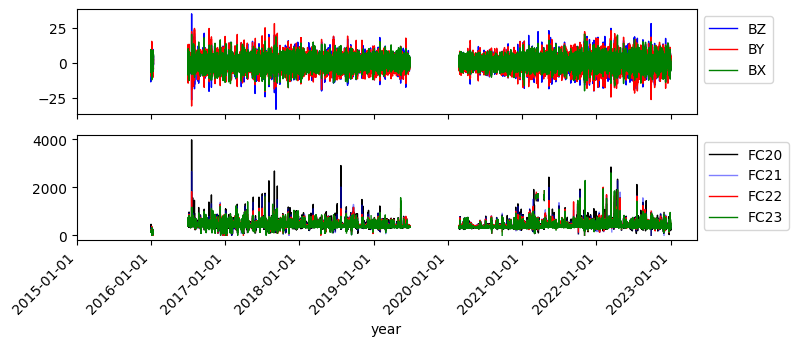

In [13]:
# # quick function for plotting overview of data
# # now in plotting.py
# def plot_var_overview(ax, t, var, ylab=False, **kwargs):
    
#     var_name = var.name # get variable name

#     ax.plot(t,var, linewidth=1, label=var_name, **kwargs)
#     if ylab == True:
#         ax.set_xlabel(f"year")
    
#     # plot legend
#     ax.legend(bbox_to_anchor=(1, 1))
    
# example, look at B(x,y,z)
fig, ax = plt.subplots(2, figsize=(8, 3), sharex=True) # (A/N): (8, 1) good size for single plot
plot_var_overview(ax[0],df['time'], df['BZ'], c='b')
plot_var_overview(ax[0],df['time'], df['BY'], c='r')
plot_var_overview(ax[0],df['time'], df['BX'], c='g')
plot_var_overview(ax[1],df['time'], df['FC20'], ylab = True, c='k')
plot_var_overview(ax[1],df['time'], df['FC21'], c='b', alpha=0.5)
plot_var_overview(ax[1],df['time'], df['FC22'], c='r')
plot_var_overview(ax[1],df['time'], df['FC23'], c='g')


# x-axis tick label rotation to fit length of dates
ax[1].set_xticks(ax[1].get_xticks().tolist())
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

# save fig
# plt.savefig('figures/overview_2016_2023.png',dpi=400)


plot: heatmap

/var/folders/8l/y30_j6_97qj5rc4x992936vr0000gp/T/ipykernel_33081/1608472421.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorr = df.corr() # corr matrix for dataframe


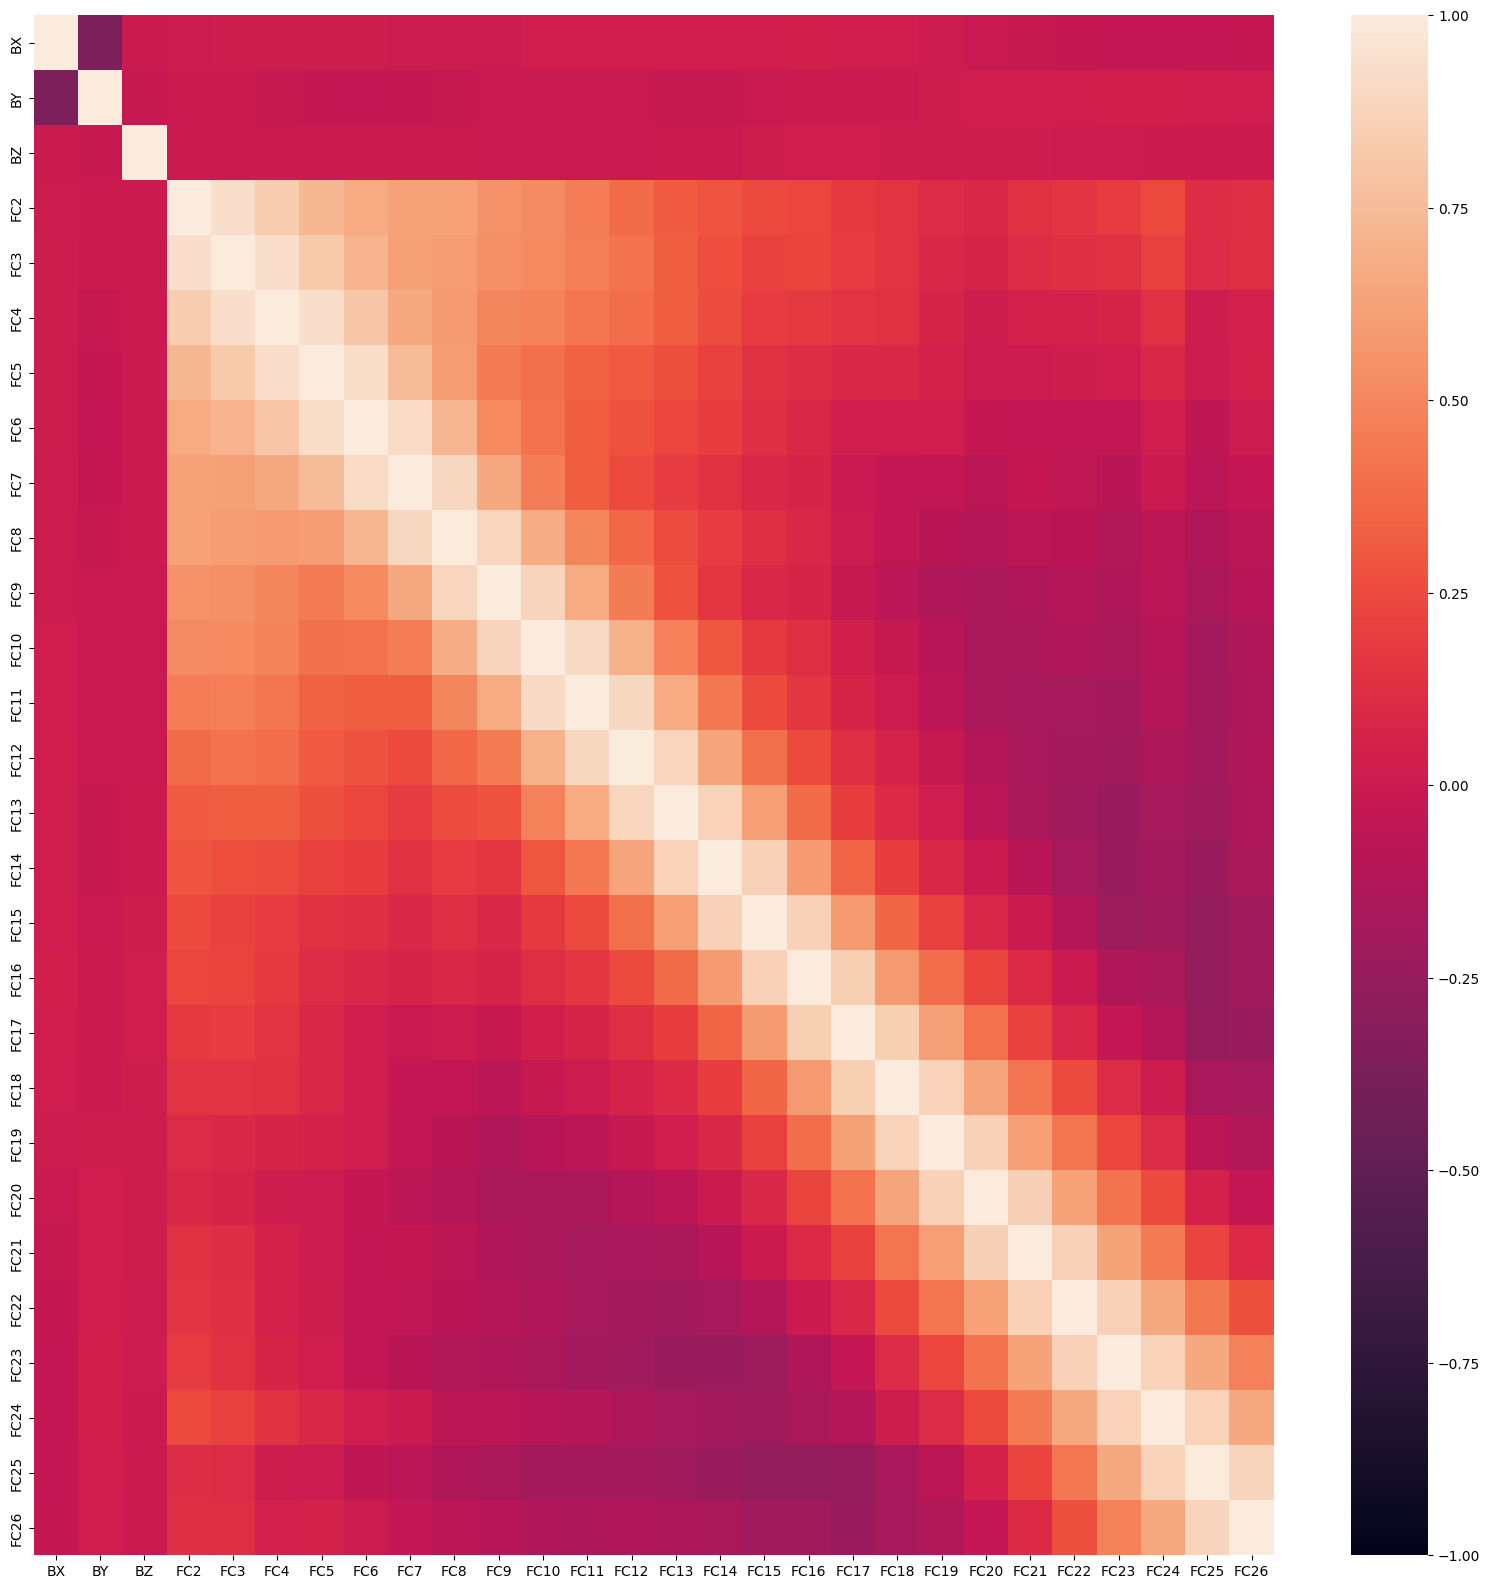

In [14]:
# # quick and dirty heatmap heatmap
dfcorr = df.corr() # corr matrix for dataframe

# create plot
fig, ax = plt.subplots(figsize=(20,20))     
sns.heatmap(dfcorr, annot=False, ax=ax, vmin=-1)

# # save fig
# plt.savefig('figures/fc_heatmap.png',dpi=400)

(17167.0, 17532.0)

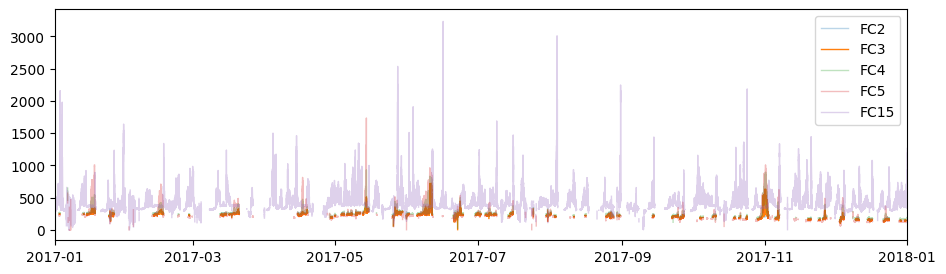

In [7]:
fig, ax = plt.subplots(1, figsize=(11, 3), sharex=True) # (A/N): (8, 1) good size for single plot


plot_var_overview(ax,df['time'], df['FC2'], alpha=0.3)
plot_var_overview(ax,df['time'], df['FC3'])
plot_var_overview(ax,df['time'], df['FC4'], alpha=0.3)
plot_var_overview(ax,df['time'], df['FC5'], alpha=0.3)
plot_var_overview(ax,df['time'], df['FC15'], alpha=0.3)
ax.set_xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2018-01-01'))


<BarContainer object of 25 artists>

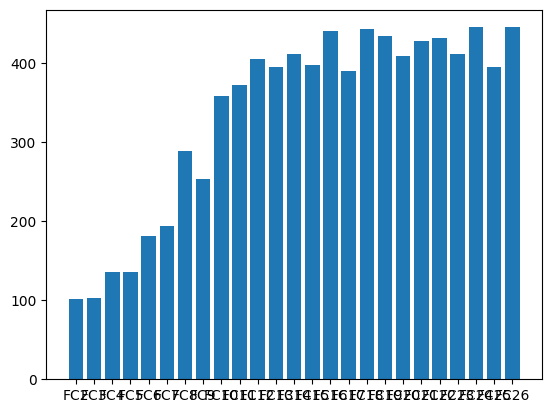

In [8]:
# # plot average (mean) for every FC
# meanlist = []
# for col in df:
#     meanlist.append(df[col].mean())

# plt.bar(list(df.columns.values[4:]),meanlist[4:])


Index(['FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FC7', 'FC8', 'FC9', 'FC10', 'FC11',
       'FC12', 'FC13', 'FC14', 'FC15', 'FC16', 'FC17', 'FC18', 'FC19', 'FC20',
       'FC21', 'FC22', 'FC23', 'FC24', 'FC25', 'FC26'],
      dtype='object')

In [9]:
# # example isolating FC data
# df_FC = df.iloc[:,4:]
# FC_names = df_FC.columns
# dfnew = pd.DataFrame(df_imp, columns=FC_names) # df with only FC vars
# fig, ax = plt.subplots(1, figsize=(15, 3), sharex=True) # (A/N): (8, 1) good size for single plot
# plot_var_overview(ax,df['time'], df_FC['FC8'], alpha=1)
# plot_var_overview(ax,df['time'], dfnew['FC8'], alpha=0.5)
# ax.set_xlim(pd.Timestamp('2017-01-09'), pd.Timestamp('2017-01-10'))